In [35]:
import torch
from flamby.datasets.fed_isic2019 import FedIsic2019
from torch.utils.data import DataLoader
import numpy as np
import os

torch.manual_seed(0)
np.random.seed(0)

os.environ['CUDA_VISIBLE_DEVICES'] = '4'
client_name = "client_1"

PARAMS = {
    "batch_size": 32,
    "local_epochs": 3,
}

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def save_str_to_file(string, dir: str):
    with open(f"{dir}/log_file.txt", "a") as file:
        file.write(string+'\n')

def load_data(client_index: int):
    train_dataset = FedIsic2019(center=client_index, train=True)
    test_dataset = FedIsic2019(train=False)
    trainloader = DataLoader(train_dataset, batch_size=PARAMS["batch_size"])
    testloader = DataLoader(test_dataset, batch_size=PARAMS["batch_size"])
    sample_rate = PARAMS["batch_size"] / len(train_dataset)

    print(f"Client {client_index} has {len(train_dataset)} samples for training and {len(test_dataset)} samples for testing.")
    return trainloader, testloader, sample_rate

In [46]:
train, test, sample = load_data(5)

Client 5 has 351 samples for training and 2483 samples for testing.


In [47]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def display_images_with_labels_train(client_index: int):
    trainloader, _, _ = load_data(client_index)

    transform_to_pil = transforms.ToPILImage()

    images_displayed = 0
    plt.figure(figsize=(15, 10))

    for batch in trainloader:
        images, labels = batch

        for i in range(images.size(0)):
            if images_displayed >= 10:
                plt.show()
                return

            plt.subplot(2, 5, images_displayed + 1)
            plt.imshow(transform_to_pil(images[i]))
            plt.title(f"Label: {labels[i].item()}" if labels is not None else "Label: N/A")
            plt.axis('off')

            images_displayed += 1

    plt.show()


def display_images_with_labels_test(client_index: int):
    _, testloader, _ = load_data(client_index)

    transform_to_pil = transforms.ToPILImage()

    images_displayed = 0
    plt.figure(figsize=(15, 10))

    for batch in testloader:
        images, labels = batch

        for i in range(images.size(0)):
            if images_displayed >= 10:
                plt.show()
                return

            plt.subplot(2, 5, images_displayed + 1)
            plt.imshow(transform_to_pil(images[i]))
            plt.title(f"Label: {labels[i].item()}" if labels is not None else "Label: N/A")
            plt.axis('off')

            images_displayed += 1

    plt.show()



Client 5 has 351 samples for training and 2483 samples for testing.


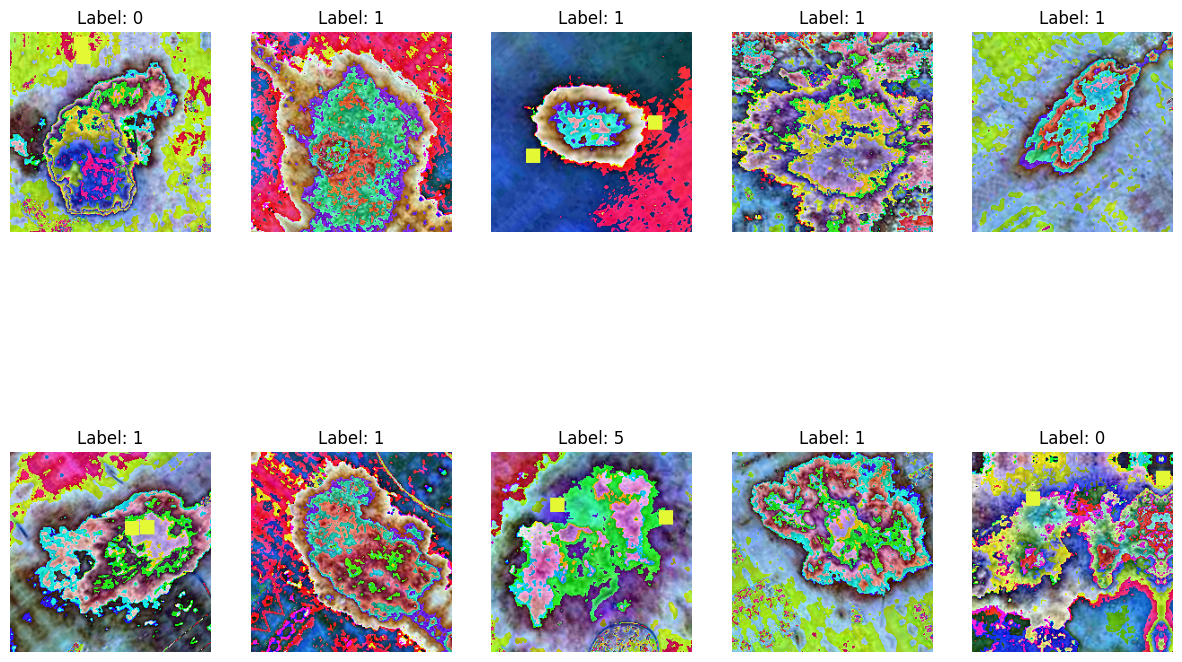

In [48]:
display_images_with_labels_train(5)

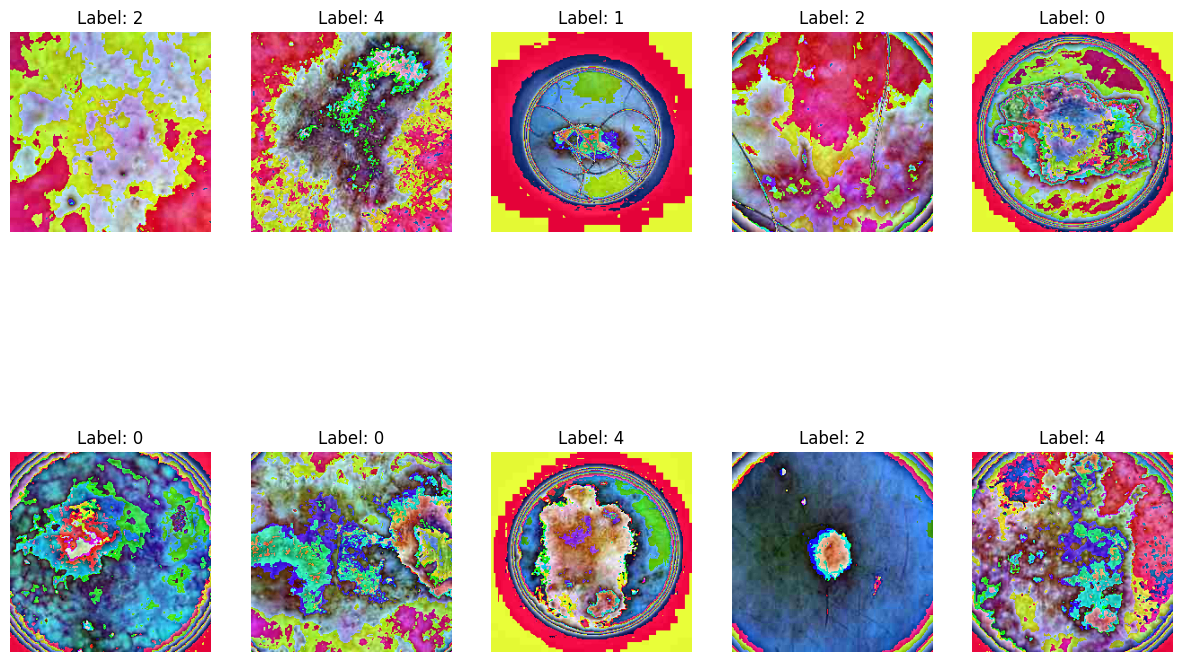

Total number of images in the test set: 32


'Labels in test set: {0, 1, 2, 3, 4, 7}'

In [33]:
display_images_with_labels_test(1)

In [ ]:
2 - 0 1 2 3 4 7